## North American Infection and Mortality Rates for COVID-19

In [1]:
# dependencies

import requests
import json
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns
import scipy.stats as st

import gmaps
#from config import gkey
import matplotlib.pyplot as plt

In [2]:
# url to call for cases data from api
url = "https://covid-api.mmediagroup.fr/v1/cases?"

In [3]:
print(requests.get(url))

<Response [200]>


In [4]:
# filter for North America
continent = "North America"
query_url = url + "continent=" + continent

# call m-media-group api for North American cases data
data_response = requests.get(query_url)
data_json = data_response.json()
data_json

{'Antigua and Barbuda': {'All': {'confirmed': 1232,
   'recovered': 1014,
   'deaths': 32,
   'country': 'Antigua and Barbuda',
   'population': 102012,
   'sq_km_area': 442,
   'life_expectancy': '70.5',
   'elevation_in_meters': None,
   'continent': 'North America',
   'abbreviation': 'AG',
   'location': 'Caribbean',
   'iso': 28,
   'capital_city': "Saint John's",
   'lat': '17.0608',
   'long': '-61.7964',
   'updated': '2021/05/06 23:21:03+00'}},
 'Bahamas': {'All': {'confirmed': 10711,
   'recovered': 9733,
   'deaths': 211,
   'country': 'Bahamas',
   'population': 395361,
   'sq_km_area': 13878,
   'life_expectancy': '71.1',
   'elevation_in_meters': None,
   'continent': 'North America',
   'abbreviation': 'BS',
   'location': 'Caribbean',
   'iso': 44,
   'capital_city': 'Nassau',
   'lat': '25.025885',
   'long': '-78.035889',
   'updated': '2021/05/06 23:21:03+00'}},
 'Barbados': {'All': {'confirmed': 3929,
   'recovered': 3831,
   'deaths': 45,
   'country': 'Barbados',


In [5]:
# filter for regions with all data fields
import json

All = []

target_url = query_url 
response = requests.get(query_url).json()
    
for key,value in response.items():
    All.append(value['All'])
    
pulled_df = pd.DataFrame(All)
pulled_df.head()

,confirmed,recovered,deaths,country,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,lat,long,updated
0,1232,1014,32,Antigua and Barbuda,102012,442,70.5,None,North America,AG,Caribbean,28,Saint John's,17.0608,-61.7964,2021/05/06 23:21:03+00
1,10711,9733,211,Bahamas,395361,13878,71.1,None,North America,BS,Caribbean,44,Nassau,25.025885,-78.035889,2021/05/06 23:21:03+00
2,3929,3831,45,Barbados,285719,430,73,None,North America,BB,Caribbean,52,Bridgetown,13.1939,-59.5432,2021/05/06 23:21:03+00
3,12680,12261,323,Belize,374681,22696,70.9,173,North America,BZ,Central America,84,Belmopan,17.1899,-88.4976,2021/05/06 23:21:03+00
4,1273499,1171664,24478,Canada,36624199,9970610,79.4,487,North America,CA,North America,124,Ottawa,NaN,NaN,NaN


In [6]:
# save cases dataframe as csv to limit API requests
pulled_df.to_csv('NAcovid.csv',index = False)

# open and read cases dataframe
df = pd.read_csv('NAcovid.csv')
df.head()

,confirmed,recovered,deaths,country,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,lat,long,updated
0,1232,1014,32,Antigua and Barbuda,102012,442,70.5,NaN,North America,AG,Caribbean,28,Saint John's,17.060800,-61.796400,2021/05/06 23:21:03+00
1,10711,9733,211,Bahamas,395361,13878,71.1,NaN,North America,BS,Caribbean,44,Nassau,25.025885,-78.035889,2021/05/06 23:21:03+00
2,3929,3831,45,Barbados,285719,430,73.0,NaN,North America,BB,Caribbean,52,Bridgetown,13.193900,-59.543200,2021/05/06 23:21:03+00
3,12680,12261,323,Belize,374681,22696,70.9,173,North America,BZ,Central America,84,Belmopan,17.189900,-88.497600,2021/05/06 23:21:03+00
4,1273499,1171664,24478,Canada,36624199,9970610,79.4,487,North America,CA,North America,124,Ottawa,NaN,NaN,NaN


In [7]:
# url to call for vaccine data from api
vacc_url = "https://covid-api.mmediagroup.fr/v1/vaccines?"

# filter for North America
continent = "North America"
vacc_query_url = vacc_url + "continent=" + continent

# call m-media-group api for North American vaccines data
vacc_data_response = requests.get(vacc_query_url)
vacc_data_json = vacc_data_response.json()
vacc_data_json

{'Anguilla': {'All': {'administered': 6898,
   'people_vaccinated': 783,
   'people_partially_vaccinated': 6115,
   'country': 'Anguilla',
   'population': 14909,
   'sq_km_area': 96,
   'life_expectancy': '76.1',
   'elevation_in_meters': None,
   'continent': 'North America',
   'abbreviation': 'AI',
   'location': 'Caribbean',
   'iso': 660,
   'capital_city': 'The Valley',
   'updated': '2021/04/22 00:00:00+00'}},
 'Antigua and Barbuda': {'All': {'administered': 29754,
   'people_vaccinated': 0,
   'people_partially_vaccinated': 29754,
   'country': 'Antigua and Barbuda',
   'population': 102012,
   'sq_km_area': 442,
   'life_expectancy': '70.5',
   'elevation_in_meters': None,
   'continent': 'North America',
   'abbreviation': 'AG',
   'location': 'Caribbean',
   'iso': 28,
   'capital_city': "Saint John's",
   'updated': '2021/04/22 00:00:00+00'}},
 'Aruba': {'All': {'administered': 79502,
   'people_vaccinated': 24143,
   'people_partially_vaccinated': 55359,
   'country': 'Ar

In [8]:
# filter for regions with all data fields 
import json

vacc_All = []

vacc_target_url = vacc_query_url 
vacc_response = requests.get(vacc_query_url).json()
    
for key,value in vacc_response.items():
    vacc_All.append(value['All'])
    
vacc_pulled_df = pd.DataFrame(vacc_All)
vacc_pulled_df.head()

,administered,people_vaccinated,people_partially_vaccinated,country,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,updated
0,6898,783,6115,Anguilla,14909,96,76.1,None,North America,AI,Caribbean,660,The Valley,2021/04/22 00:00:00+00
1,29754,0,29754,Antigua and Barbuda,102012,442,70.5,None,North America,AG,Caribbean,28,Saint John's,2021/04/22 00:00:00+00
2,79502,24143,55359,Aruba,105264,193,78.4,None,North America,AW,Caribbean,533,Oranjestad,2021/05/05 00:00:00+00
3,25692,0,25692,Bahamas,395361,13878,71.1,None,North America,BS,Caribbean,44,Nassau,2021/04/27 00:00:00+00
4,75006,0,75006,Barbados,285719,430,73,None,North America,BB,Caribbean,52,Bridgetown,2021/05/03 00:00:00+00


In [9]:
# save vaccines dataframe as csv to limit API requests
vacc_pulled_df.to_csv('NAcovidvacc.csv',index = False)

# open and read vaccines dataframe 
vacc_df = pd.read_csv('NAcovidvacc.csv')
vacc_df.head()

,administered,people_vaccinated,people_partially_vaccinated,country,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,updated
0,6898,783,6115,Anguilla,14909,96,76.1,NaN,North America,AI,Caribbean,660,The Valley,2021/04/22 00:00:00+00
1,29754,0,29754,Antigua and Barbuda,102012,442,70.5,NaN,North America,AG,Caribbean,28,Saint John's,2021/04/22 00:00:00+00
2,79502,24143,55359,Aruba,105264,193,78.4,NaN,North America,AW,Caribbean,533,Oranjestad,2021/05/05 00:00:00+00
3,25692,0,25692,Bahamas,395361,13878,71.1,NaN,North America,BS,Caribbean,44,Nassau,2021/04/27 00:00:00+00
4,75006,0,75006,Barbados,285719,430,73.0,NaN,North America,BB,Caribbean,52,Bridgetown,2021/05/03 00:00:00+00


In [10]:
# print out datatypes for cases dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   confirmed            23 non-null     int64  
 1   recovered            23 non-null     int64  
 2   deaths               23 non-null     int64  
 3   country              23 non-null     object 
 4   population           23 non-null     int64  
 5   sq_km_area           23 non-null     int64  
 6   life_expectancy      23 non-null     float64
 7   elevation_in_meters  15 non-null     object 
 8   continent            23 non-null     object 
 9   abbreviation         23 non-null     object 
 10  location             23 non-null     object 
 11  iso                  23 non-null     int64  
 12  capital_city         23 non-null     object 
 13  lat                  21 non-null     float64
 14  long                 21 non-null     float64
 15  updated              20 non-null     objec

In [11]:
# new cases dataframe with filtered down columns
columns_to_keep = [
    'country',
    'confirmed',
    'deaths',
    'population',
    'sq_km_area',
    'life_expectancy',
    'location'

    ]
new_df = df[columns_to_keep]
new_df

,country,confirmed,deaths,population,sq_km_area,life_expectancy,location
0,Antigua and Barbuda,1232,32,102012,442,70.5,Caribbean
1,Bahamas,10711,211,395361,13878,71.1,Caribbean
2,Barbados,3929,45,285719,430,73.0,Caribbean
3,Belize,12680,323,374681,22696,70.9,Central America
4,Canada,1273499,24478,36624199,9970610,79.4,North America
5,Costa Rica,263094,3341,4905769,51100,75.8,Central America
6,Cuba,112714,701,11484636,110861,76.2,Caribbean
7,Dominica,174,0,73925,751,73.4,Caribbean
8,Dominican Republic,269184,3514,10766998,48511,73.2,Caribbean
9,El Salvador,69997,2143,6377853,21041,69.7,Central America


In [12]:
# recall cases dataframe types 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          23 non-null     object 
 1   confirmed        23 non-null     int64  
 2   deaths           23 non-null     int64  
 3   population       23 non-null     int64  
 4   sq_km_area       23 non-null     int64  
 5   life_expectancy  23 non-null     float64
 6   location         23 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.4+ KB


In [13]:
# rename cleaned dataframe 
clean_df = new_df.copy()

In [14]:
# recall cases dataframe types 
clean_df.dtypes

country             object
confirmed            int64
deaths               int64
population           int64
sq_km_area           int64
life_expectancy    float64
location            object
dtype: object

In [15]:
# append column for population density to cases dataframe 
clean_df['Population Density'] = new_df['population'] / new_df['sq_km_area']
clean_df

,country,confirmed,deaths,population,sq_km_area,life_expectancy,location,Population Density
0,Antigua and Barbuda,1232,32,102012,442,70.5,Caribbean,230.796380
1,Bahamas,10711,211,395361,13878,71.1,Caribbean,28.488327
2,Barbados,3929,45,285719,430,73.0,Caribbean,664.462791
3,Belize,12680,323,374681,22696,70.9,Central America,16.508680
4,Canada,1273499,24478,36624199,9970610,79.4,North America,3.673215
5,Costa Rica,263094,3341,4905769,51100,75.8,Central America,96.003307
6,Cuba,112714,701,11484636,110861,76.2,Caribbean,103.594916
7,Dominica,174,0,73925,751,73.4,Caribbean,98.435419
8,Dominican Republic,269184,3514,10766998,48511,73.2,Caribbean,221.949620
9,El Salvador,69997,2143,6377853,21041,69.7,Central America,303.115489


In [16]:
# append confirmed per capita, deaths per capita, mortality rate columns to cases dataframe
clean_df['Confirmed Per Capita'] = new_df['confirmed'] / new_df['population']
clean_df['Deaths Per Capita'] = new_df['deaths'] / new_df['population']
clean_df['Mortality Rate'] = new_df['deaths'] / new_df['confirmed']

# change datatype of life expectancy column to be a float 
clean_df['life_expectancy'] = clean_df['life_expectancy'].apply(float)

# print out and examine clean cases dataframe 
clean_df                                                               

,country,confirmed,deaths,population,sq_km_area,life_expectancy,location,Population Density,Confirmed Per Capita,Deaths Per Capita,Mortality Rate
0,Antigua and Barbuda,1232,32,102012,442,70.5,Caribbean,230.796380,0.012077,0.000314,0.025974
1,Bahamas,10711,211,395361,13878,71.1,Caribbean,28.488327,0.027092,0.000534,0.019699
2,Barbados,3929,45,285719,430,73.0,Caribbean,664.462791,0.013751,0.000157,0.011453
3,Belize,12680,323,374681,22696,70.9,Central America,16.508680,0.033842,0.000862,0.025473
4,Canada,1273499,24478,36624199,9970610,79.4,North America,3.673215,0.034772,0.000668,0.019221
5,Costa Rica,263094,3341,4905769,51100,75.8,Central America,96.003307,0.053630,0.000681,0.012699
6,Cuba,112714,701,11484636,110861,76.2,Caribbean,103.594916,0.009814,0.000061,0.006219
7,Dominica,174,0,73925,751,73.4,Caribbean,98.435419,0.002354,0.000000,0.000000
8,Dominican Republic,269184,3514,10766998,48511,73.2,Caribbean,221.949620,0.025001,0.000326,0.013054
9,El Salvador,69997,2143,6377853,21041,69.7,Central America,303.115489,0.010975,0.000336,0.030616


#### Continental Data and Visualizations

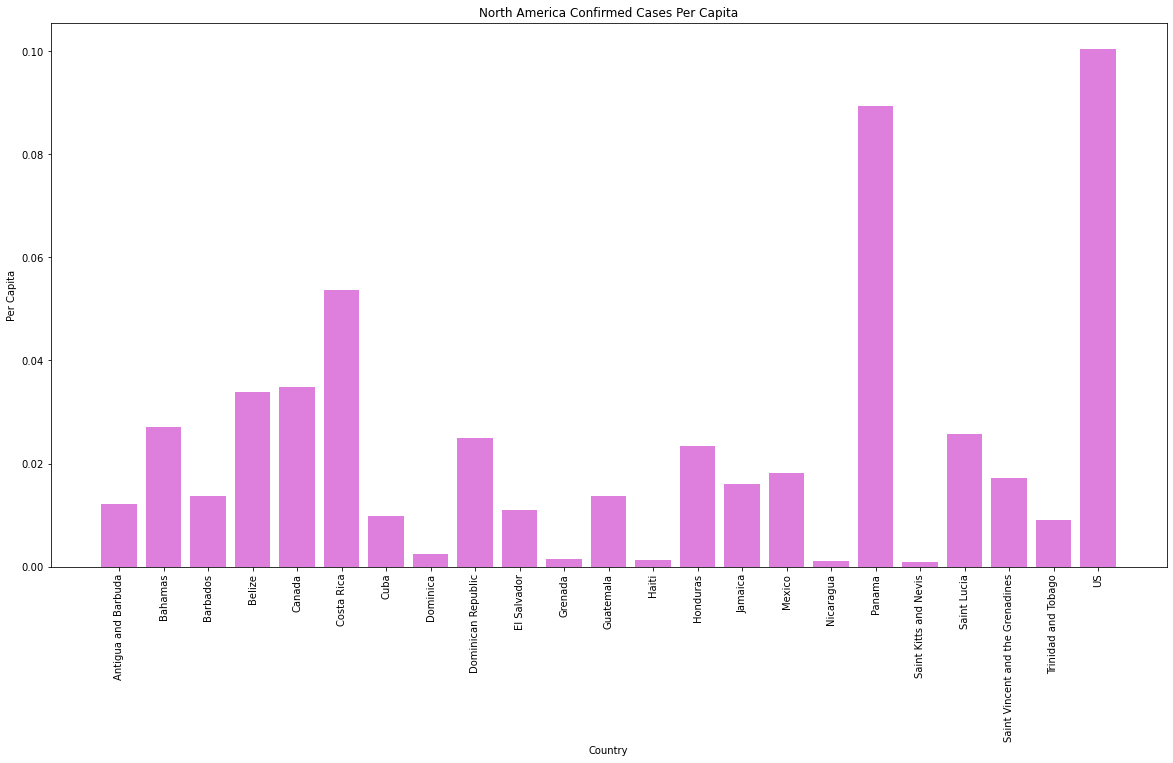

In [17]:
# Look at the rate of COVID-19 infection by country 
x_axis = clean_df['country']
y_axis = clean_df['Confirmed Per Capita']

plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='m', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation = 90, fontsize = 10)
plt.title('North America Confirmed Cases Per Capita')
plt.ylabel('Per Capita')
plt.xlabel('Country')

plt.savefig("Images/NAConfirmedCases.png")
plt.show()

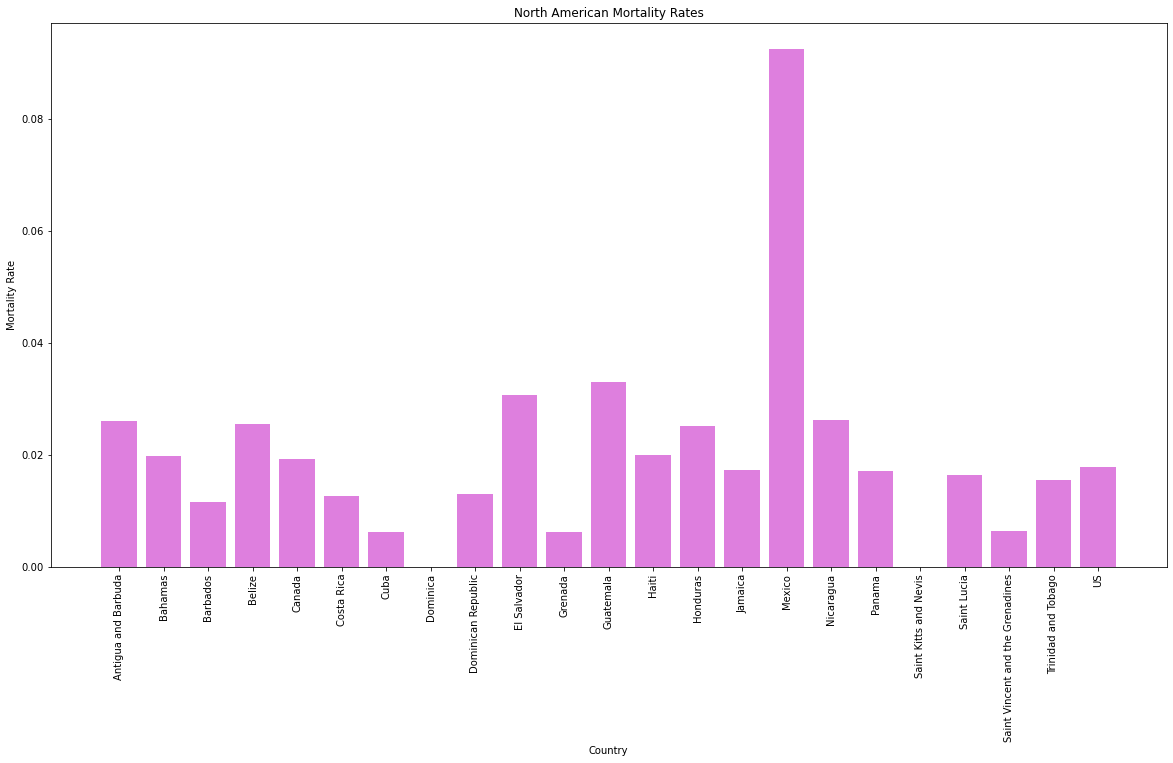

In [18]:
# Look at the mortality rates of COVID-19 by country 
x_axis = clean_df['country']
y_axis = clean_df['Mortality Rate']
plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='m', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation = 90, fontsize = 10)
plt.title('North American Mortality Rates')
plt.ylabel('Mortality Rate')
plt.xlabel('Country')

plt.savefig("Images/NAMortalityRates.png")
plt.show()

The r-squared is: 0.007722393275973635


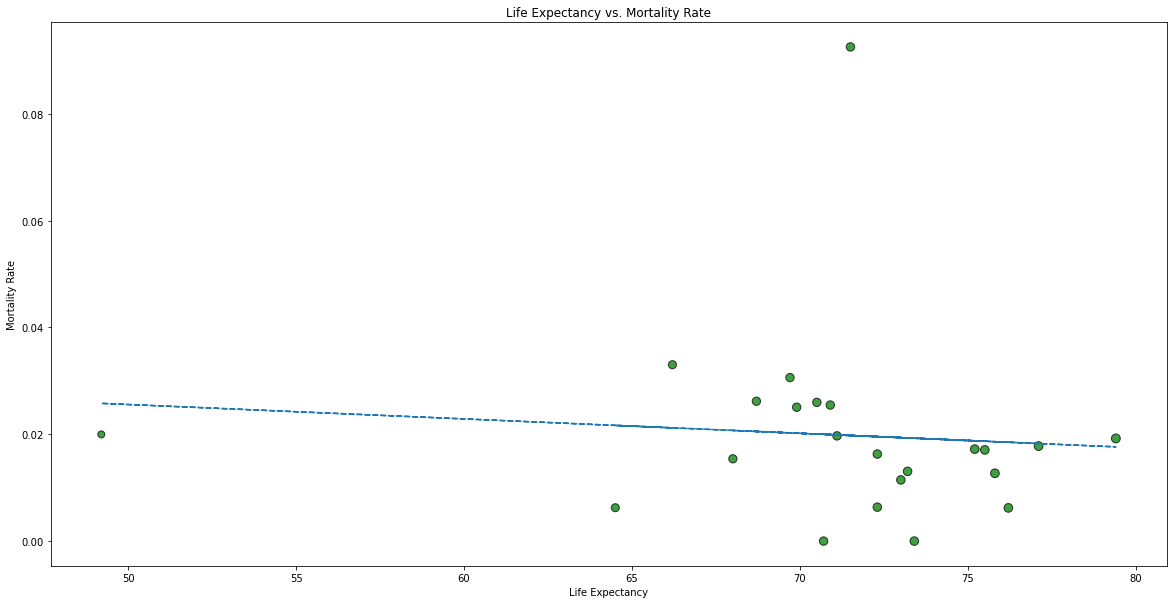

In [19]:
# look for any correlation between a nation's Life Expectancy (a proxy for healthcare quality) and mortality rate
# of COVID-10
# Scatter Plot of Life Expectancy and Mortality Rate
x_axis = clean_df['life_expectancy']
y_axis = clean_df['Mortality Rate']

plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black",
            s=x_axis, alpha=0.75)

slope, intercept, r, p, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
plt.plot(x_axis,fit,"--")

plt.ylabel('Mortality Rate')
plt.xlabel('Life Expectancy')
plt.title('Life Expectancy vs. Mortality Rate')
print(f"The r-squared is: {r**2}")

plt.savefig("Images/LifeExpectancyVMortality.png")
plt.show()

The r-squared is: 0.17433966596583197


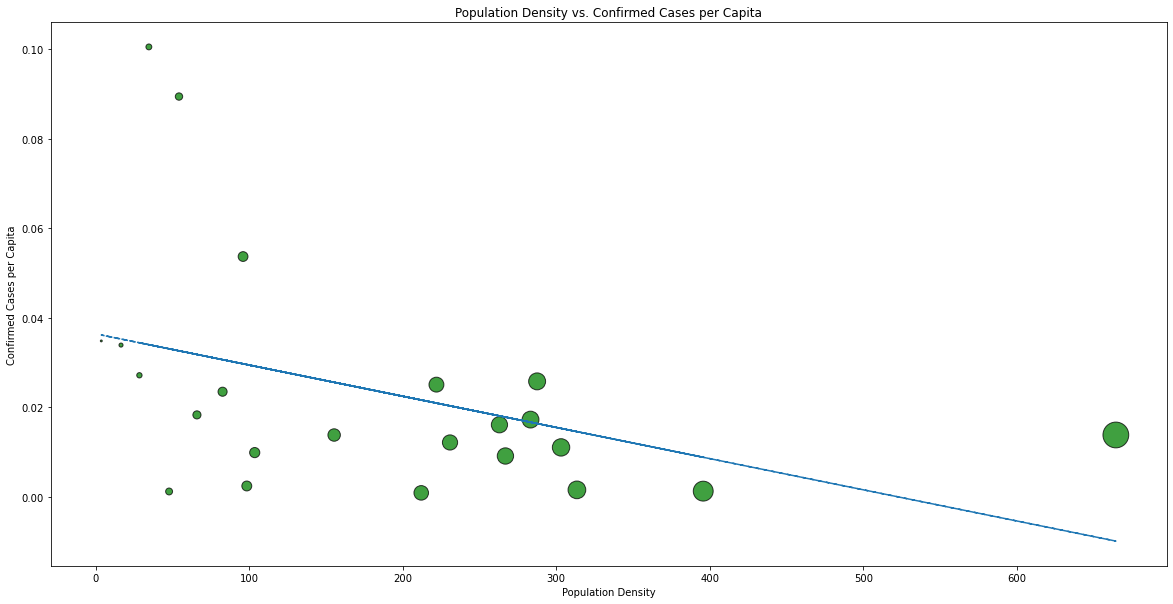

In [20]:
# look for any correlation between a nation's population density and infection rate of COVID-19
# Scatter Plot of Population Density and Confirmed Per Capita
x_axis = clean_df['Population Density']
y_axis = clean_df['Confirmed Per Capita']
plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black",
            s=x_axis, alpha=0.75)

slope, intercept, r, p, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
plt.plot(x_axis,fit,"--")

plt.ylabel('Confirmed Cases per Capita')
plt.xlabel('Population Density')
plt.title('Population Density vs. Confirmed Cases per Capita')
print(f"The r-squared is: {r**2}")

plt.savefig("Images/PopDensityVCases.png")
plt.show()

The r-squared is: 0.05314204190746313


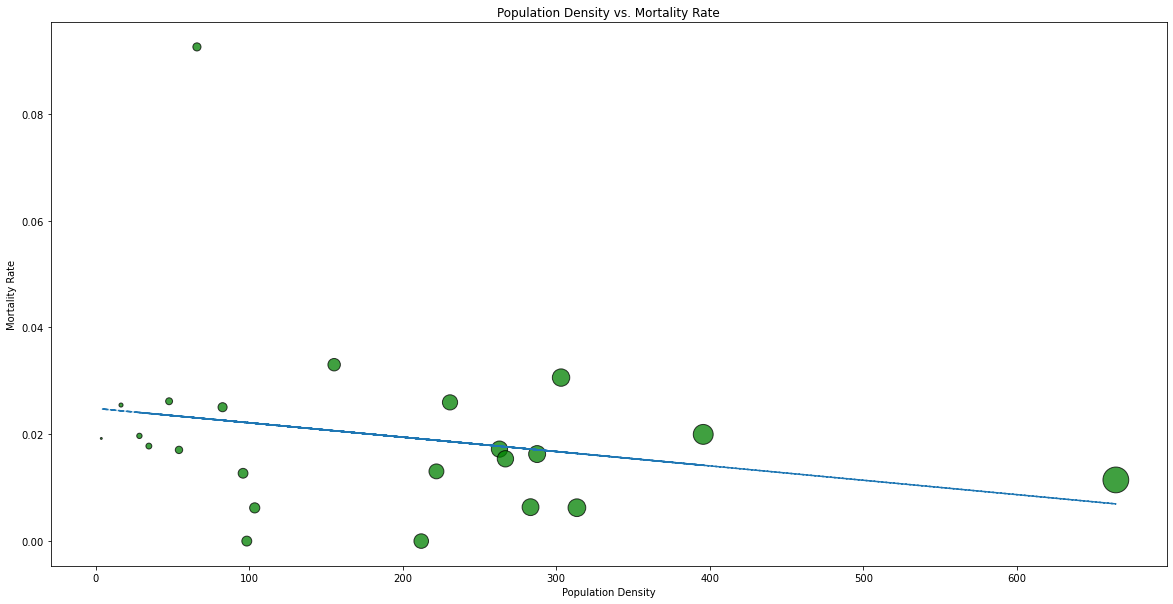

In [21]:
# look for any correlation between a nation's population density and mortality rate of COVID-19
# Scatter Plot of Population Density and Mortality Rate
x_axis = clean_df['Population Density']
y_axis = clean_df['Mortality Rate']
plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black",
            s=x_axis, alpha=0.75)

slope, intercept, r, p, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
plt.plot(x_axis,fit,"--")

plt.ylabel('Mortality Rate')
plt.xlabel('Population Density')
plt.title('Population Density vs. Mortality Rate')
print(f"The r-squared is: {r**2}")

plt.savefig("Images/PopDensityVMortality.png")
plt.show()

## Begin Regional (location) Analysis

In [22]:
# Use GroupBy in order to separate the data into fields according to "location" values
grouped_df = clean_df.groupby(['location'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df)

# In order to be visualized, a data function must be used...
clean_group_df = grouped_df.sum()
clean_group_df

,confirmed,deaths,population,sq_km_area,life_expectancy,Population Density,Confirmed Per Capita,Deaths Per Capita,Mortality Rate
location,,,,,,,,,
Caribbean,476538,5843,38801215,220358,909.6,3369.591735,0.161592,0.002370,0.157908
Central America,3524512,243368,177316317,2479532,568.2,821.675691,0.244359,0.006163,0.262675
North America,33875075,604503,361083662,19334130,156.5,38.324657,0.135252,0.002456,0.037012


In [23]:
clean_grouped_df = clean_group_df.drop(['life_expectancy'],axis=1)
clean_grouped_df

,confirmed,deaths,population,sq_km_area,Population Density,Confirmed Per Capita,Deaths Per Capita,Mortality Rate
location,,,,,,,,
Caribbean,476538,5843,38801215,220358,3369.591735,0.161592,0.002370,0.157908
Central America,3524512,243368,177316317,2479532,821.675691,0.244359,0.006163,0.262675
North America,33875075,604503,361083662,19334130,38.324657,0.135252,0.002456,0.037012


In [24]:
clean_grouped_df['Population Density'] = clean_grouped_df['population'] / clean_grouped_df['sq_km_area']
clean_grouped_df['Confirmed per Capita'] = clean_grouped_df['confirmed'] / clean_grouped_df['population']
clean_grouped_df['Deaths per Capita'] = clean_grouped_df['deaths'] / clean_grouped_df['population']
clean_grouped_df['Morbidity Rate'] = clean_grouped_df['deaths'] / clean_grouped_df['confirmed']

clean_grouped_df

,confirmed,deaths,population,sq_km_area,Population Density,Confirmed Per Capita,Deaths Per Capita,Mortality Rate,Confirmed per Capita,Deaths per Capita,Morbidity Rate
location,,,,,,,,,,,
Caribbean,476538,5843,38801215,220358,176.082625,0.161592,0.002370,0.157908,0.012282,0.000151,0.012261
Central America,3524512,243368,177316317,2479532,71.512010,0.244359,0.006163,0.262675,0.019877,0.001373,0.069050
North America,33875075,604503,361083662,19334130,18.675972,0.135252,0.002456,0.037012,0.093815,0.001674,0.017845


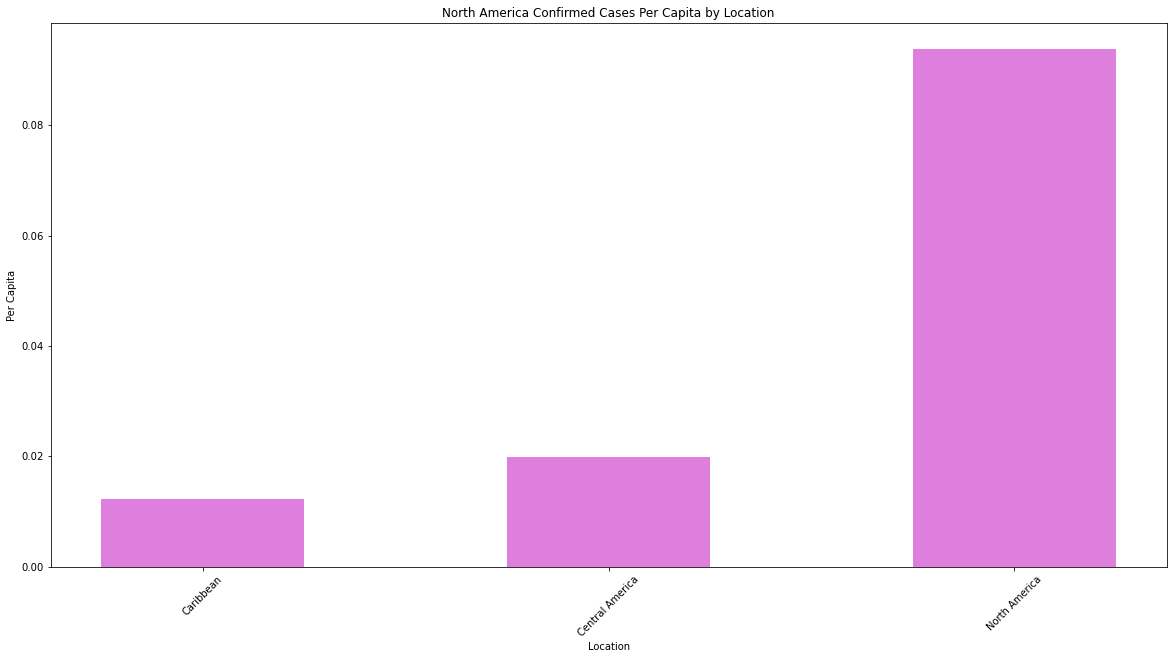

In [25]:
# Look at the rate of COVID-19 infection by location 
x_axis = clean_grouped_df.reset_index()['location']
y_axis = clean_grouped_df['Confirmed per Capita']

plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='m', alpha=0.5, align="center", width = 0.5)
tick_locations = [value for value in x_axis]
plt.xticks(rotation = 45, fontsize = 10)
plt.title('North America Confirmed Cases Per Capita by Location')
plt.ylabel('Per Capita')
plt.xlabel('Location')

plt.savefig("Images/LocationConfirmedCases.png")
plt.show()

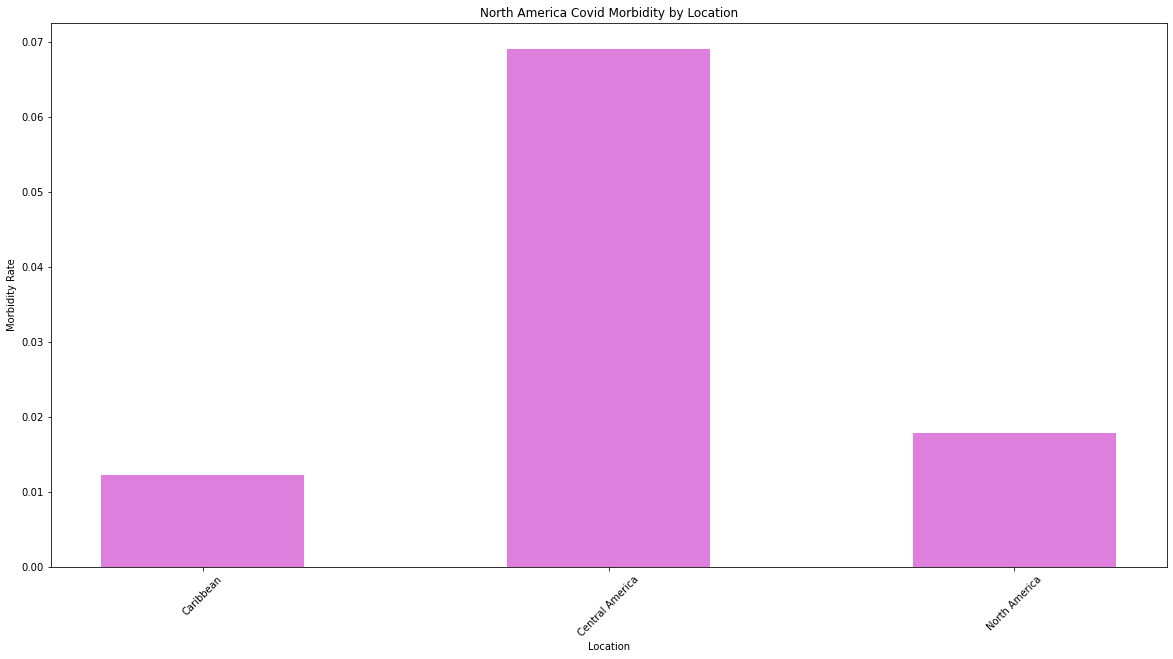

In [26]:
# Look at the rate of COVID-19 mortality by location 
x_axis = clean_grouped_df.reset_index()['location']
y_axis = clean_grouped_df['Morbidity Rate']

plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='m', alpha=0.5, align="center", width = 0.5)
tick_locations = [value for value in x_axis]
plt.xticks(rotation = 45, fontsize = 10)
plt.title('North America Covid Morbidity by Location')
plt.ylabel('Morbidity Rate')
plt.xlabel('Location')

plt.savefig("Images/LocationMorbidity.png")
plt.show()

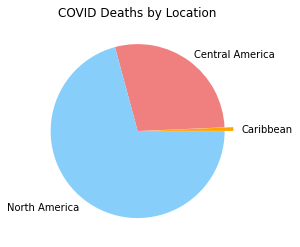

In [27]:
# create pie chart demonstrating the share of North American deaths due to COVID-19 from each region
colors = ['orange', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)
         
plt.pie(clean_grouped_df['deaths'],labels = clean_grouped_df.reset_index()['location'], 
        colors = colors, explode = explode)
plt.title("COVID Deaths by Location")

plt.savefig("Images/DeathsbyLoc.png")
plt.show()

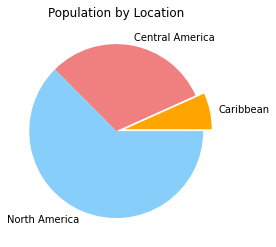

In [28]:
# create pie chart demonstrating the share of North American population from each region
colors = ['orange', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)
         
plt.pie(clean_grouped_df['population'],labels = clean_grouped_df.reset_index()['location'], 
        colors = colors, explode = explode)
plt.title("Population by Location")

plt.savefig("Images/PopbyLocation.png")
plt.show()

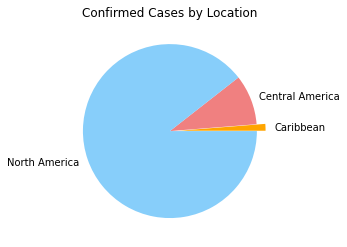

In [29]:
# create pie chart demonstrating the share of North American COVID cases from each region
colors = ['orange', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)
         
plt.pie(clean_grouped_df['confirmed'],labels = clean_grouped_df.reset_index()['location'], 
        colors = colors, explode = explode)
plt.title("Confirmed Cases by Location")

plt.savefig("Images/ConfirmedbyLocation.png")
plt.show()

## Begin Vaccine Data Analysis

In [30]:
# print out vaccine dataframe data types 
vacc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   administered                 27 non-null     int64  
 1   people_vaccinated            27 non-null     int64  
 2   people_partially_vaccinated  27 non-null     int64  
 3   country                      27 non-null     object 
 4   population                   27 non-null     int64  
 5   sq_km_area                   27 non-null     int64  
 6   life_expectancy              27 non-null     float64
 7   elevation_in_meters          13 non-null     object 
 8   continent                    27 non-null     object 
 9   abbreviation                 27 non-null     object 
 10  location                     27 non-null     object 
 11  iso                          27 non-null     int64  
 12  capital_city                 27 non-null     object 
 13  updated               

In [31]:
# select columns from vaccine dataframe to keep, mainly those not included in the cases dataframe 
columns_to_keep = [
    'administered',
    'people_vaccinated',
    'people_partially_vaccinated',
    'country'
    ]
vacc_new_df = vacc_df[columns_to_keep]

# print out and examine smaller vaccine dataframe 
vacc_new_df

,administered,people_vaccinated,people_partially_vaccinated,country
0,6898,783,6115,Anguilla
1,29754,0,29754,Antigua and Barbuda
2,79502,24143,55359,Aruba
3,25692,0,25692,Bahamas
4,75006,0,75006,Barbados
5,44548,0,44548,Belize
6,55904,23775,32129,Bermuda
7,14568067,1173962,13394105,Canada
8,69573,32511,37062,Cayman Islands
9,950252,345153,605099,Costa Rica


In [33]:
# merge cleaned cases and vaccine dataframes on their shared country field, keeping all cases data
merged_df = pd.merge(vacc_new_df, clean_df, how = "right", on = 'country')
merged_df

,administered,people_vaccinated,people_partially_vaccinated,country,confirmed,deaths,population,sq_km_area,life_expectancy,location,Population Density,Confirmed Per Capita,Deaths Per Capita,Mortality Rate
0,29754.0,0.0,29754.0,Antigua and Barbuda,1232,32,102012,442,70.5,Caribbean,230.796380,0.012077,0.000314,0.025974
1,25692.0,0.0,25692.0,Bahamas,10711,211,395361,13878,71.1,Caribbean,28.488327,0.027092,0.000534,0.019699
2,75006.0,0.0,75006.0,Barbados,3929,45,285719,430,73.0,Caribbean,664.462791,0.013751,0.000157,0.011453
3,44548.0,0.0,44548.0,Belize,12680,323,374681,22696,70.9,Central America,16.508680,0.033842,0.000862,0.025473
4,14568067.0,1173962.0,13394105.0,Canada,1273499,24478,36624199,9970610,79.4,North America,3.673215,0.034772,0.000668,0.019221
5,950252.0,345153.0,605099.0,Costa Rica,263094,3341,4905769,51100,75.8,Central America,96.003307,0.053630,0.000681,0.012699
6,NaN,NaN,NaN,Cuba,112714,701,11484636,110861,76.2,Caribbean,103.594916,0.009814,0.000061,0.006219
7,27821.0,9323.0,18498.0,Dominica,174,0,73925,751,73.4,Caribbean,98.435419,0.002354,0.000000,0.000000
8,2197153.0,807263.0,1389890.0,Dominican Republic,269184,3514,10766998,48511,73.2,Caribbean,221.949620,0.025001,0.000326,0.013054
9,991133.0,101024.0,890109.0,El Salvador,69997,2143,6377853,21041,69.7,Central America,303.115489,0.010975,0.000336,0.030616


In [34]:
# drop rows with NaN values
clean_alldata_df = merged_df.dropna()
clean_alldata_df

,administered,people_vaccinated,people_partially_vaccinated,country,confirmed,deaths,population,sq_km_area,life_expectancy,location,Population Density,Confirmed Per Capita,Deaths Per Capita,Mortality Rate
0,29754.0,0.0,29754.0,Antigua and Barbuda,1232,32,102012,442,70.5,Caribbean,230.796380,0.012077,0.000314,0.025974
1,25692.0,0.0,25692.0,Bahamas,10711,211,395361,13878,71.1,Caribbean,28.488327,0.027092,0.000534,0.019699
2,75006.0,0.0,75006.0,Barbados,3929,45,285719,430,73.0,Caribbean,664.462791,0.013751,0.000157,0.011453
3,44548.0,0.0,44548.0,Belize,12680,323,374681,22696,70.9,Central America,16.508680,0.033842,0.000862,0.025473
4,14568067.0,1173962.0,13394105.0,Canada,1273499,24478,36624199,9970610,79.4,North America,3.673215,0.034772,0.000668,0.019221
5,950252.0,345153.0,605099.0,Costa Rica,263094,3341,4905769,51100,75.8,Central America,96.003307,0.053630,0.000681,0.012699
7,27821.0,9323.0,18498.0,Dominica,174,0,73925,751,73.4,Caribbean,98.435419,0.002354,0.000000,0.000000
8,2197153.0,807263.0,1389890.0,Dominican Republic,269184,3514,10766998,48511,73.2,Caribbean,221.949620,0.025001,0.000326,0.013054
9,991133.0,101024.0,890109.0,El Salvador,69997,2143,6377853,21041,69.7,Central America,303.115489,0.010975,0.000336,0.030616
10,15397.0,2731.0,12666.0,Grenada,160,1,107825,344,64.5,Caribbean,313.444767,0.001484,0.000009,0.006250


In [36]:
cleaner_alldata_df = clean_alldata_df.copy()

In [37]:
cleaner_alldata_df['Administered Per Capita'] = cleaner_alldata_df['administered'] / cleaner_alldata_df['population']
cleaner_alldata_df['Vaccinated Per Capita'] = cleaner_alldata_df['people_vaccinated'] / cleaner_alldata_df['population']
cleaner_alldata_df['Partially Vaccinated Per Capita'] = cleaner_alldata_df['people_partially_vaccinated'] / cleaner_alldata_df['population']
cleaner_alldata_df

,administered,people_vaccinated,people_partially_vaccinated,country,confirmed,deaths,population,sq_km_area,life_expectancy,location,Population Density,Confirmed Per Capita,Deaths Per Capita,Mortality Rate,Administered Per Capita,Vaccinated Per Capita,Partially Vaccinated Per Capita
0,29754.0,0.0,29754.0,Antigua and Barbuda,1232,32,102012,442,70.5,Caribbean,230.796380,0.012077,0.000314,0.025974,0.291672,0.000000,0.291672
1,25692.0,0.0,25692.0,Bahamas,10711,211,395361,13878,71.1,Caribbean,28.488327,0.027092,0.000534,0.019699,0.064984,0.000000,0.064984
2,75006.0,0.0,75006.0,Barbados,3929,45,285719,430,73.0,Caribbean,664.462791,0.013751,0.000157,0.011453,0.262517,0.000000,0.262517
3,44548.0,0.0,44548.0,Belize,12680,323,374681,22696,70.9,Central America,16.508680,0.033842,0.000862,0.025473,0.118896,0.000000,0.118896
4,14568067.0,1173962.0,13394105.0,Canada,1273499,24478,36624199,9970610,79.4,North America,3.673215,0.034772,0.000668,0.019221,0.397772,0.032054,0.365717
5,950252.0,345153.0,605099.0,Costa Rica,263094,3341,4905769,51100,75.8,Central America,96.003307,0.053630,0.000681,0.012699,0.193701,0.070357,0.123344
7,27821.0,9323.0,18498.0,Dominica,174,0,73925,751,73.4,Caribbean,98.435419,0.002354,0.000000,0.000000,0.376341,0.126114,0.250227
8,2197153.0,807263.0,1389890.0,Dominican Republic,269184,3514,10766998,48511,73.2,Caribbean,221.949620,0.025001,0.000326,0.013054,0.204064,0.074976,0.129088
9,991133.0,101024.0,890109.0,El Salvador,69997,2143,6377853,21041,69.7,Central America,303.115489,0.010975,0.000336,0.030616,0.155402,0.015840,0.139562
10,15397.0,2731.0,12666.0,Grenada,160,1,107825,344,64.5,Caribbean,313.444767,0.001484,0.000009,0.006250,0.142796,0.025328,0.117468


The r-squared is: 0.0035755237313168597


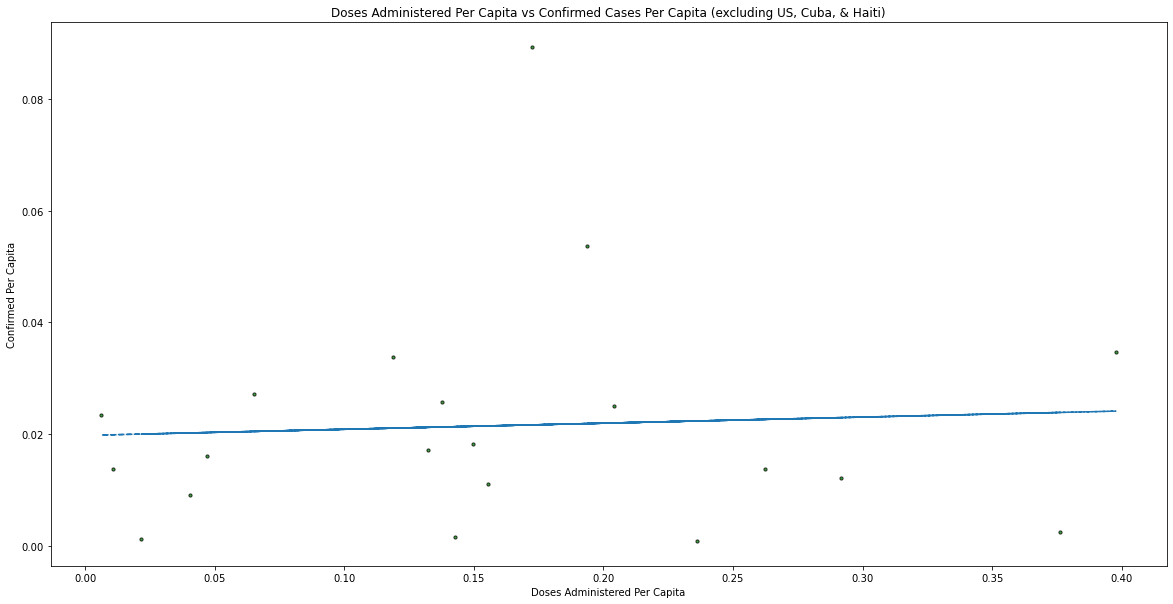

In [52]:
# Scatter Plot of Administered Per Capita vs Confirmed Per Capita
x_axis = cleaner_alldata_df['Administered Per Capita']
y_axis = cleaner_alldata_df['Confirmed Per Capita']

plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black",
            s=10, alpha=0.75)

slope, intercept, r, p, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
plt.plot(x_axis,fit,"--")

plt.ylabel('Confirmed Per Capita')
plt.xlabel('Doses Administered Per Capita')
plt.title('Doses Administered Per Capita vs Confirmed Cases Per Capita (excluding US, Cuba, & Haiti)')
print(f"The r-squared is: {r**2}")

plt.savefig("DosesAdministeredPerCapitavsConfirmedCasesPerCapita_excluding US, Cuba, & Haiti")
plt.show()

The r-squared is: 0.9476860037211594


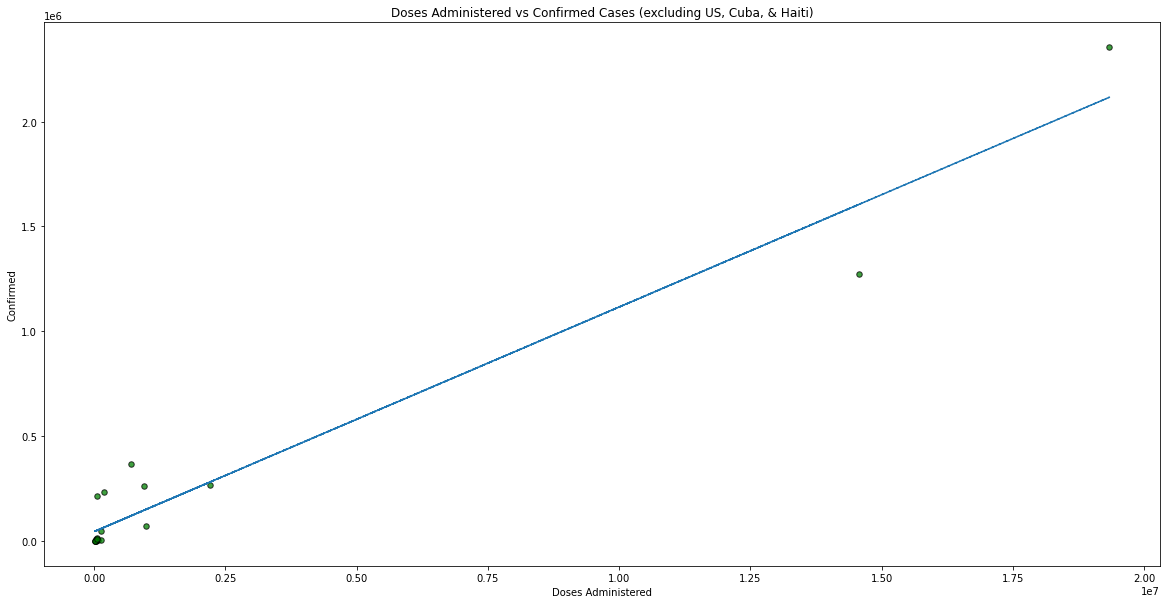

In [51]:
x_axis = cleaner_alldata_df['administered']
y_axis = cleaner_alldata_df['confirmed']

plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)

slope, intercept, r, p, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
plt.plot(x_axis,fit,"--")

plt.ylabel('Confirmed')
plt.xlabel('Doses Administered')
plt.title('Doses Administered vs Confirmed Cases (excluding US, Cuba, & Haiti)')
print(f"The r-squared is: {r**2}")

plt.savefig("DosesAdministeredvsConfirmedCases_excludingUSCubaHaiti.png")
plt.show()

The r-squared is: 0.0014189782959130326


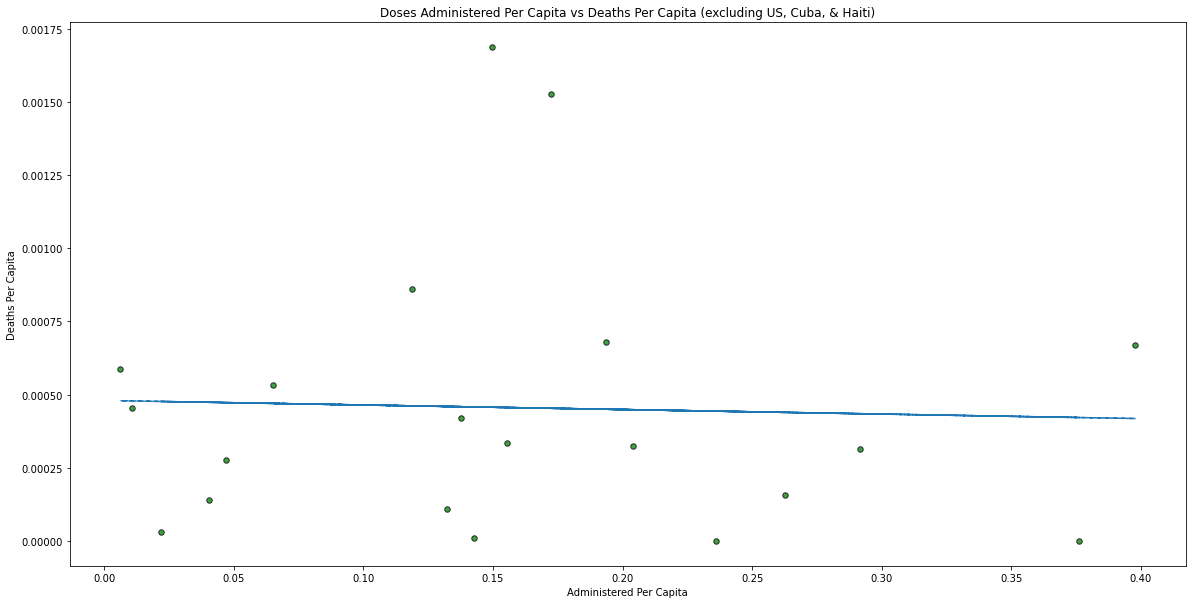

In [54]:
x_axis = cleaner_alldata_df['Administered Per Capita']
y_axis = cleaner_alldata_df['Deaths Per Capita']

plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)

slope, intercept, r, p, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
plt.plot(x_axis,fit,"--")

plt.ylabel('Deaths Per Capita')
plt.xlabel('Administered Per Capita')
plt.title('Doses Administered Per Capita vs Deaths Per Capita (excluding US, Cuba, & Haiti)')
print(f"The r-squared is: {r**2}")

plt.savefig("DosesAdministeredPerCapitavsDeathsPerCapita_excludingUSCubaHaiti.png")
plt.show()

In [ ]:
# g = sns.pairplot(clean_df, corner=True)  
# g.map_lower()

# plt.savefig("Images/seaborn.png")
# plt.show()